# # **Statistcs in Python**
## Two Way ANOVA 

Written by: M.Danish Azeem\
Date: 25.12.2023\
Email: danishazeem365@gmail.com

In [1]:
# import librares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# creat a dataset

df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'medim', 'high'], 5),2),
                   'height': [6,6,6,5,6,5,5,6,4,5,
                              6,6,7,8,7,3,4,4,4,5,
                              4,4,4,4,4,5,6,6,7,8]})
df.sample(10)

,water,sun,height
10,daily,high,6
1,daily,low,6
17,weekly,low,4
21,weekly,medim,4
27,weekly,high,6
25,weekly,high,5
4,daily,low,6
13,daily,high,8
18,weekly,low,4
16,weekly,low,4


<Axes: xlabel='sun', ylabel='height'>

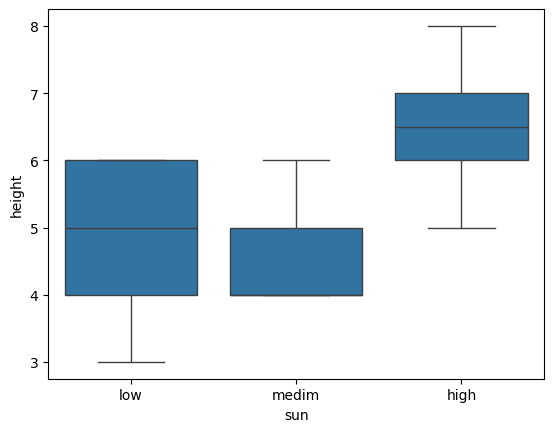

In [8]:
sns.boxplot(x=df['sun'], y=df['height'])

<Axes: xlabel='sun', ylabel='height'>

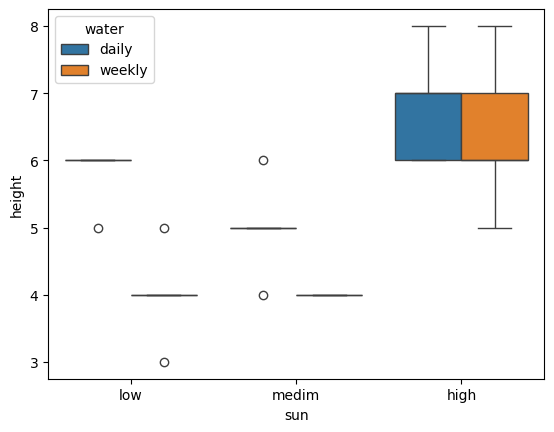

In [11]:
sns.boxplot(x=df['sun'], y=df['height'], hue=df['water'])

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ANOVA
model = ols('height ~ sun', data=df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


In [16]:
#TWO way-ANOVA
model = ols('height ~ C(sun) + C(water) + C(sun) : C(water) ', data=df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


In [17]:
# another way of doing this (two way ANOVA)
import pingouin as pg
aov = pg.anova(data=df,dv = 'height', between=['sun','water'], detailed=True)
print(aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


In [ ]:
# tukey test kasisay lagna hy two way anova per?
# lettering or grouping kaisy karni?
# Annotationkaisay karni hy graphs main? 



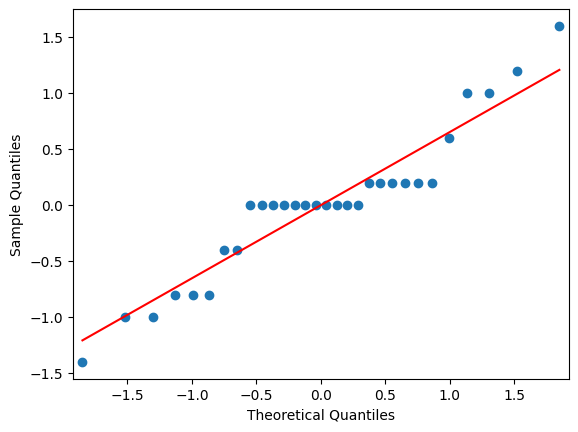

In [18]:
#qq normal plot
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

# Example DataFrame
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'medium', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

# Create a new variable combining both factors
df['group'] = df['water'] + '_' + df['sun']

# Fit a two-way ANOVA model
formula = 'height ~ C(water) + C(sun) + C(water):C(sun)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Perform Tukey's HSD test
tukey_results = MultiComparison(df['height'], groups=df['group']).tukeyhsd()

# Display Tukey results
print("Tukey's HSD Test:")
print(tukey_results)

# Lettering or Grouping based on Tukey results
grouped_means = tukey_results.groupstats
letters = [chr(65 + i) for i in range(len(grouped_means))]
grouped_means['group'] = letters

# Merge lettering with original DataFrame
df = pd.merge(df, grouped_means[['group']], left_on='group', right_index=True)

# Plotting with seaborn and grouping annotation
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sun', y='height', hue='group', data=df, palette='Set3')
plt.show()


Tukey's HSD Test:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1        group2    meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------
  daily_high     daily_low     -1.0 0.2898 -2.4281  0.4281  False
  daily_high  daily_medium     -1.8 0.0079 -3.2281 -0.3719   True
  daily_high   weekly_high     -0.4  0.951 -1.8281  1.0281  False
  daily_high    weekly_low     -2.8    0.0 -4.2281 -1.3719   True
  daily_high weekly_medium     -2.8    0.0 -4.2281 -1.3719   True
   daily_low  daily_medium     -0.8 0.5252 -2.2281  0.6281  False
   daily_low   weekly_high      0.6 0.7827 -0.8281  2.0281  False
   daily_low    weekly_low     -1.8 0.0079 -3.2281 -0.3719   True
   daily_low weekly_medium     -1.8 0.0079 -3.2281 -0.3719   True
daily_medium   weekly_high      1.4  0.057 -0.0281  2.8281  False
daily_medium    weekly_low     -1.0 0.2898 -2.4281  0.4281  False
daily_medium weekly_medium     -1.0 0.2898 -2.4281  0.4281

AttributeError: 'TukeyHSDResults' object has no attribute 'groupstats'

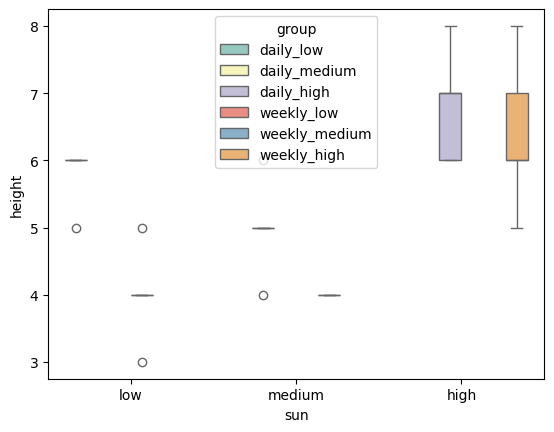

In [31]:
sns.boxplot(x='sun', y='height', hue='group', data=df, palette='Set3')
plt.show()
